# Text Classification Benchmarks

In this notebook, we plot the performance of Drago and baselines on text classification benchmarks on the `emotion` dataset. See Section 4 and Appendix E for full experimental descriptions.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from plotting_utils import plot_iterations, plot_runtime

import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams['legend.fontsize'] = 33
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
L2_REG = 1.0    # primal regularization (mu)
SM_MEDIUM = 1.0 # dual regularization (nu)
SM_SMALL  = 1e-2
SM_XSMALL = 1e-3

In [3]:
l2_reg = L2_REG
result_dir = "../results"

plot_cfgs = [
    {
        "optimizer": "sgd",
        "label": "SGD",
        "color": "black",
        "linestyle": "solid",
        "marker": ".",
    },
    {
        "optimizer": "lsvrg",
        "label": "LSVRG",
        "color": "cadetblue",
        "linestyle": "solid",
        "marker": "o",
    },
    {
        "optimizer": "drago_block",
        "label": r"Drago ($b=n/d$)",
        "color": "tab:red",
        "linestyle": "solid",
        "marker": "^",
    },
]

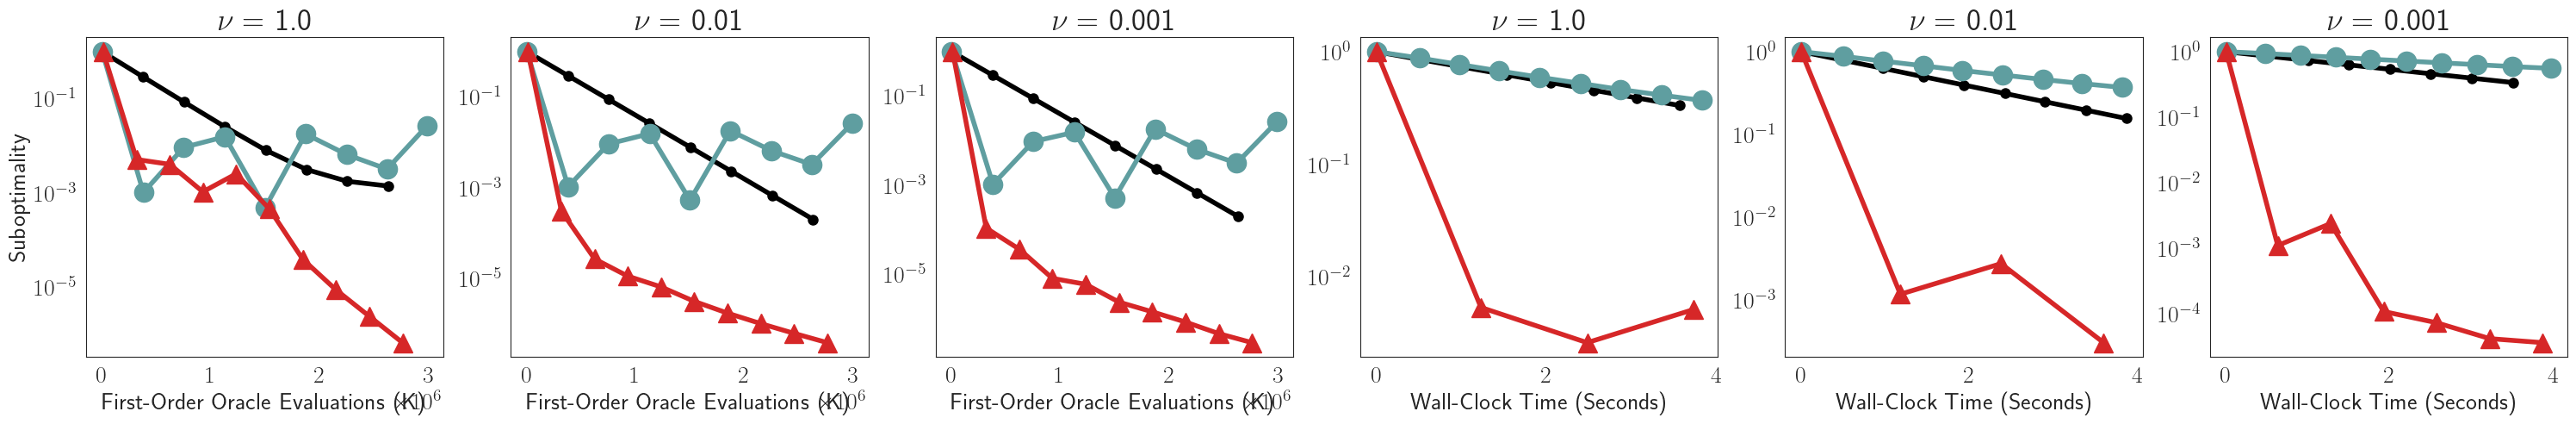

In [5]:
seeds = [3, 4]

dataset = "emotion"
objective = "superquantile_lite"
sm_coefs = [SM_MEDIUM, SM_SMALL, SM_XSMALL]

obj_names = {
    "superquantile_lite": "CVaR", 
}

n_class = 6
verbose = False

limits = {
    "emotion": 3000000,
}

loss_dict = {
    "yacht": "squared_error", 
    "energy": "squared_error",
    "concrete": "squared_error", 
    "acsincome": "squared_error",
    "kin8nm": "squared_error", 
    "power": "squared_error", 
    "iwildcam_std": "multinomial_cross_entropy", 
    "emotion": "multinomial_cross_entropy", 
}

sns.set_style("white")

n_row = 1
n_col = 6
scale = 5
fig, axes = plt.subplots(n_row, n_col, figsize=(scale * n_col, scale * n_row))

for i, sm_coef in enumerate(sm_coefs):
    # r = i // n_col
    # c = i % n_col
    c = i

    model_cfg = {
        "objective": objective, 
        "l2_reg": l2_reg, 
        "loss": loss_dict[dataset], 
        "n_class": n_class,
        "sm_coef": sm_coef,
        "smoothing": "l2"
    }
    for plot_cfg in plot_cfgs:
        # if not (plot_cfg["optimizer"] == "drago_auto"):
        plot_iterations(
            axes[c], 
            dataset, 
            model_cfg, 
            plot_cfg, 
            seeds, 
            verbose=verbose,
            n_points=8,
            markersize=16,
            out_path=result_dir,
            limit=limits[dataset]
        )
        # if not (plot_cfg["optimizer"] == "drago_auto"):
        plot_runtime(
            axes[c + 3], 
            dataset, 
            model_cfg, 
            plot_cfg, 
            seeds, 
            verbose=verbose,
            n_points=8,
            markersize=16,
            out_path=result_dir,
            limit=4
        )
    axes[c].set_yscale("log")
    axes[c].set_title(r"$\nu =$ " + f"{sm_coef}")
    axes[c].set_xlabel("First-Order Oracle Evaluations (K)")

    axes[c + 3].set_yscale("log")
    axes[c + 3].set_title(r"$\nu =$ " + f"{sm_coef}")
    axes[c + 3].set_xlabel("Wall-Clock Time (Seconds)")

title_fontsize = 28
y_fontsize = 32

handles, labels = axes[00].get_legend_handles_labels()
axes[0].set_ylabel("Suboptimality")

fig.tight_layout(pad=1.0)
plt.show()